Prep your data: Have a feature matrix (e.g., from lyrics) and song metadata (title, artist, etc.).

Split into train/validation/test sets (if doing supervised evaluation).

Fit a KNN model on the training set embeddings.

Generate recommendations by querying nearest neighbors.

Evaluate using your validation/test set (if needed).

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors


In [2]:
df_test_encoded = pd.read_csv('week_5_test_encoded.csv')

df_train_encoded = pd.read_csv('week_5_train_encoded.csv')

df_val_encoded = pd.read_csv('week_5_validation_encoded.csv')

In [3]:
df_train_encoded.columns

Index(['Song', 'Artist', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic',
       'Happy', 'Loud', 'Clean_Lyrics', 'Power', 'sqrt_Acoustic', 'sqrt_BPM',
       'camelot_sin', 'camelot_cos', 'Genre_alternative', 'Genre_country',
       'Genre_dance', 'Genre_electronic', 'Genre_folk', 'Genre_hip hop',
       'Genre_indie', 'Genre_pop', 'Genre_rnb', 'Genre_rock', 'Genre_soul',
       'Subgenre_alternative', 'Subgenre_alternative rnb',
       'Subgenre_alternative rock', 'Subgenre_country', 'Subgenre_country pop',
       'Subgenre_dance', 'Subgenre_dance electronic', 'Subgenre_dance pop',
       'Subgenre_electronic', 'Subgenre_electronic dance',
       'Subgenre_electronic pop', 'Subgenre_folk', 'Subgenre_folk rock',
       'Subgenre_hip hop', 'Subgenre_hip hop 90s', 'Subgenre_hip hop rnb',
       'Subgenre_indie', 'Subgenre_indie alternative', 'Subgenre_indie folk',
       'Subgenre_indie pop', 'Subgenre_indie rock', 'Subgenre_pop',
       'Subgenre_pop 60s', 'Subgenre_pop 70s', 'Subge

In [4]:
import numpy as np

def str_to_embedding(s):
    # Remove [ and ] characters
    s = s.strip('[]')
    # Split by spaces and convert each to float
    return np.array([float(x) for x in s.split()])

# Example usage:
embedding_str = "[-5.49920015e-02 -4.24173214e-02 1.20421372e-02]"
embedding_vector = str_to_embedding(embedding_str)
print(embedding_vector)

[-0.054992   -0.04241732  0.01204214]


In [5]:
df_train_encoded['Embeddings'] = df_train_encoded['Embeddings'].apply(str_to_embedding)


In [6]:

df_test_encoded['Embeddings'] = df_test_encoded['Embeddings'].apply(str_to_embedding)

df_val_encoded['Embeddings'] = df_val_encoded['Embeddings'].apply(str_to_embedding)


In [7]:
df_train_encoded.head()

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Loud,Clean_Lyrics,...,Subgenre_rock 90s,Subgenre_rock alternative,Subgenre_soul,Subgenre_soul 60s,Subgenre_soul 70s,Subgenre_soul 80s,Subgenre_soul disco,Subgenre_soul rnb,Tokens,Embeddings
0,Stretch You Out (feat. A Boogie wit da Hoodie),"Summer Walker,A Boogie Wit da Hoodie",0.50,0.317647,0.623529,0.494737,0.252525,0.231579,0.76,get london da track niggas insecure claim enou...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"['get', 'london', 'da', 'track', 'niggas', 'in...","[-0.0549920015, -0.0424173214, 0.120421372, -0..."
1,On Melancholy Hill,Gorillaz,0.80,0.417647,0.682353,0.726316,0.000000,0.578947,0.80,melancholy hill good side consumerism like muc...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['melancholy', 'hill', 'good', 'side', 'consum...","[-0.0140985716, -0.0445414186, 0.111462869, 0...."
2,WHO CARES?,Rex Orange County,0.35,0.217647,0.835294,0.242105,0.595960,0.589474,0.80,mmmm mmmm mmmm mmmm first time try free doubt ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['mmmm', 'mmmm', 'mmmm', 'mmmm', 'first', 'tim...","[-0.00185818132, -0.0364763662, 0.147965446, 0..."
3,Solid,Ashford & Simpson,0.45,0.305882,0.823529,0.442105,0.272727,0.978947,0.56,love sake mistake oh forgave soon learn trust ...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"['love', 'sake', 'mistake', 'oh', 'forgave', '...","[-0.0136662908, -0.0114702322, 0.119016811, 0...."
4,BREAK MY SOUL,Beyoncé,0.55,0.388235,0.682353,0.884211,0.060606,0.863158,0.84,'bout explode take load bend bust open ya make...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[""'bout"", 'explode', 'take', 'load', 'bend', '...","[-0.0563979559, -0.0503409989, 0.103356943, -0..."


That should have converted the embeddings to floats instead of a string.

In [8]:
print(type(df_train_encoded['Embeddings'].iloc[0]))


<class 'numpy.ndarray'>


In order to build a KNN model with just the lyrics we have to convert the embeddings into a matrix.

In [9]:
X_train = np.stack(df_train_encoded['Embeddings'].values)

X_val = np.stack(df_val_encoded['Embeddings'].values)

X_test = np.stack(df_test_encoded['Embeddings'].values)

Fitting the model using the lyrics in X_train will give the vector space that can be used to generate recommendations.

Starting off with 5 as the number of neighbors, will alter this to tune the model.

###Fitting the KNN model

#### n_neighbours = 5

In [10]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X_train)

NearestNeighbors(metric='cosine')

Fidning recommendations

In [11]:
distances, indices = knn.kneighbors(X_test)

In [12]:
knn15 = NearestNeighbors(n_neighbors=15, metric='cosine')
knn15.fit(X_train)

NearestNeighbors(metric='cosine', n_neighbors=15)

In [13]:
distances15, indices15 = knn15.kneighbors(X_test)

In [14]:
knn50 = NearestNeighbors(n_neighbors=50, metric='cosine')
knn50.fit(X_train)

NearestNeighbors(metric='cosine', n_neighbors=50)

In [15]:
distances50, indices50 = knn50.kneighbors(X_test)

### Test 1

In [16]:
test_song_idx = 161  # first test song
neighbors_indices = indices[test_song_idx]
neighbors_distances = distances[test_song_idx]

print(f"Recommendations for test song: {df_test_encoded['Song'].iloc[test_song_idx]} by {df_test_encoded['Artist'].iloc[test_song_idx]}")
for rank, (idx, dist) in enumerate(zip(neighbors_indices, neighbors_distances), 1):
    song_name = df_train_encoded['Song'].iloc[idx]  # from training set
    artist_name = df_train_encoded['Artist'].iloc[idx]  # from training set
    print(f"{rank}. {song_name} by {artist_name} (distance: {dist:.4f})")


Recommendations for test song: The Body (feat. Jeremih) by Wale,Jeremih
1. Can't Get Enough by J. Cole,Trey Songz (distance: 0.0168)
2. Diced Pineapples by Rick Ross,Wale,Drake (distance: 0.0177)
3. Aston Martin Music by Rick Ross,Drake,Chrisette Michele (distance: 0.0186)
4. Poetic Justice by Kendrick Lamar,Drake (distance: 0.0195)
5. Paris Morton Music by Drake (distance: 0.0202)


In [17]:
test_song_idx = 10  # first test song
neighbors_indices = indices15[test_song_idx]
neighbors_distances = distances15[test_song_idx]

print(f"Recommendations for test song: {df_test_encoded['Song'].iloc[test_song_idx]} by {df_test_encoded['Artist'].iloc[test_song_idx]}")
for rank, (idx, dist) in enumerate(zip(neighbors_indices, neighbors_distances), 1):
    song_name = df_train_encoded['Song'].iloc[idx]  # from training set
    artist_name = df_train_encoded['Artist'].iloc[idx]  # from training set
    print(f"{rank}. {song_name} by {artist_name} (distance: {dist:.4f})")

Recommendations for test song: Let Me Love You Tonight by Pure Prairie League
1. Love Somebody by Morgan Wallen (distance: 0.0378)
2. Where It Ends by Bailey Zimmerman (distance: 0.0380)
3. Matilda by Harry Styles (distance: 0.0400)
4. Broken Clocks by SZA (distance: 0.0404)
5. Curtains by Ed Sheeran (distance: 0.0406)
6. Love's Train by Bruno Mars,Anderson .Paak,Silk Sonic (distance: 0.0407)
7. Biggest Part of Me by Ambrosia (distance: 0.0415)
8. Gold (Stupid Love) by Excision,ILLENIUM,Shallows (distance: 0.0434)
9. Dark Necessities by Red Hot Chili Peppers (distance: 0.0449)
10. Let Me Love You by Mario (distance: 0.0450)
11. The Kind of Love We Make by Luke Combs (distance: 0.0451)
12. What Ifs (feat. Lauren Alaina) by Kane Brown,Lauren Alaina (distance: 0.0452)
13. Lucy by Still Woozy,ODIE (distance: 0.0457)
14. Say So by Doja Cat (distance: 0.0460)
15. Bound 2 by Kanye West (distance: 0.0464)


In [18]:
#Finding song info

df_test_encoded[df_test_encoded['Song'] == "About Damn Time"]


,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Loud,Clean_Lyrics,...,Subgenre_rock 90s,Subgenre_rock alternative,Subgenre_soul,Subgenre_soul 60s,Subgenre_soul 70s,Subgenre_soul 80s,Subgenre_soul disco,Subgenre_soul rnb,Tokens,Embeddings
0,About Damn Time,Lizzo,0.725,0.352941,0.858824,0.726316,0.10101,0.726316,0.8,anyway bad bitch clock yeah thickthirty lot st...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['anyway', 'bad', 'bitch', 'clock', 'yeah', 't...","[-0.0989516005, -0.0316421837, 0.0966719836, -..."


In [19]:
df_train_encoded[df_train_encoded['Song'] == "In The Morning"]

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Loud,Clean_Lyrics,...,Subgenre_rock 90s,Subgenre_rock alternative,Subgenre_soul,Subgenre_soul 60s,Subgenre_soul 70s,Subgenre_soul 80s,Subgenre_soul disco,Subgenre_soul rnb,Tokens,Embeddings
1296,In The Morning,"J. Cole,Drake",0.6375,0.2,0.388235,0.652632,0.767677,0.473684,0.6,baby summertime fine let get top underline try...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['baby', 'summertime', 'fine', 'let', 'get', '...","[-0.115763538, -0.0358272232, 0.102921471, 0.0..."


In [20]:
df_train_encoded[df_train_encoded['Song'] == "Wanna Be Startin' Somethin'"]

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Loud,Clean_Lyrics,...,Subgenre_rock 90s,Subgenre_rock alternative,Subgenre_soul,Subgenre_soul 60s,Subgenre_soul 70s,Subgenre_soul 80s,Subgenre_soul disco,Subgenre_soul rnb,Tokens,Embeddings
371,Wanna Be Startin' Somethin',Michael Jackson,0.5875,0.429412,0.858824,0.863158,0.030303,0.926316,0.72,say want startin ' something got startin ' som...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['say', 'want', 'startin', ""'"", 'something', '...","[-0.0842479467, -0.0425135046, 0.0977631807, -..."


In [21]:
df_train_encoded[df_train_encoded['Song'] == "SOS"]

,Song,Artist,Popularity,BPM,Dance,Energy,Acoustic,Happy,Loud,Clean_Lyrics,...,Subgenre_rock 90s,Subgenre_rock alternative,Subgenre_soul,Subgenre_soul 60s,Subgenre_soul 70s,Subgenre_soul 80s,Subgenre_soul disco,Subgenre_soul rnb,Tokens,Embeddings
58,SOS,Rihanna,0.7625,0.517647,0.670588,0.652632,0.000000,0.526316,0.84,lalala lalala lalalalala oh know never feel li...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['lalala', 'lalala', 'lalalalala', 'oh', 'know...","[-0.0948650688, -0.0494057797, 0.117370851, -0..."
1443,SOS,SZA,0.5500,0.411765,0.470588,0.642105,0.676768,0.505263,0.76,last night cry give second give minute nah lil...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['last', 'night', 'cry', 'give', 'second', 'gi...","[-0.0660857782, -0.0262794234, 0.104556039, -0..."
1658,SOS,ABBA,0.6000,0.441176,0.329412,0.705263,0.060606,0.494737,0.84,happy day seem hard find try reach close mind ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['happy', 'day', 'seem', 'hard', 'find', 'try'...","[-0.0142980199, -0.088082172, 0.133879215, -0...."


Might have issue with duplicates - Not able to tell? Going to need to include artists along with the song title I think to differentiate

## **Things to try**


*   How to deal with duplicates
*   Different n_neighbour numbers
* Figure out the evaluation portion. Maybe run the kmeans clustering as anothe r"model" and evaluate that for this week




### Test 2 - Same number of neighbours just different song

In [22]:
test_song_idx = 90  # first test song
neighbors_indices = indices[test_song_idx]
neighbors_distances = distances[test_song_idx]

test_song_name = df_test_encoded['Song'].iloc[test_song_idx]
test_artist = df_test_encoded['Artist'].iloc[test_song_idx]

print(f"Recommendations for test song: {df_test_encoded['Song'].iloc[test_song_idx]} by {df_test_encoded['Artist'].iloc[test_song_idx]}")
for rank, (idx, dist) in enumerate(zip(neighbors_indices, neighbors_distances), 1):
    song_name = df_train_encoded['Song'].iloc[idx]  # from training set
    artist_name = df_train_encoded['Artist'].iloc[idx]  # from training set
    print(f"{rank}. {song_name} by {artist_name} (distance: {dist:.4f})")


Recommendations for test song: Nas Is Like by Nas
1. Ether by Nas (distance: 0.0358)
2. Hail Mary by Makaveli (distance: 0.0368)
3. N.Y. State of Mind by Nas (distance: 0.0373)
4. Devil In A New Dress by Kanye West,Rick Ross (distance: 0.0384)
5. A Milli by Lil Wayne (distance: 0.0387)


For now asking chat what it would give it similarity wise based on lyrics and semantic meaning

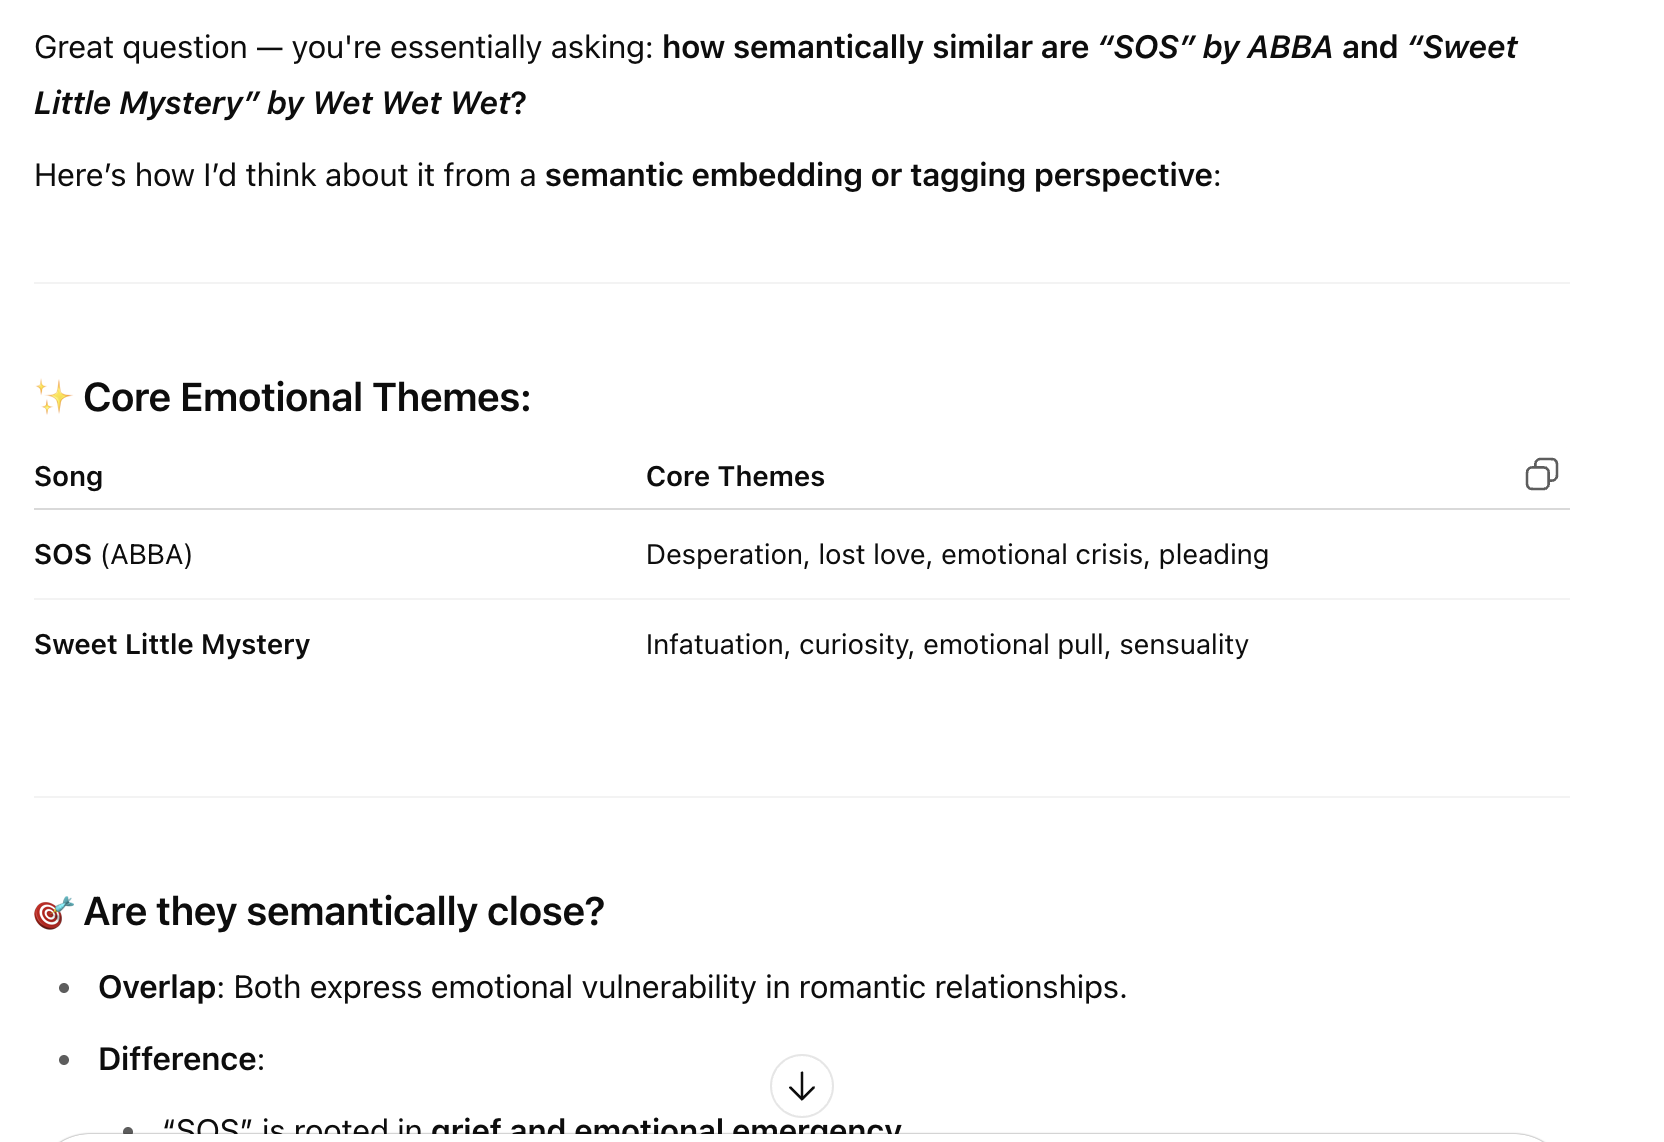

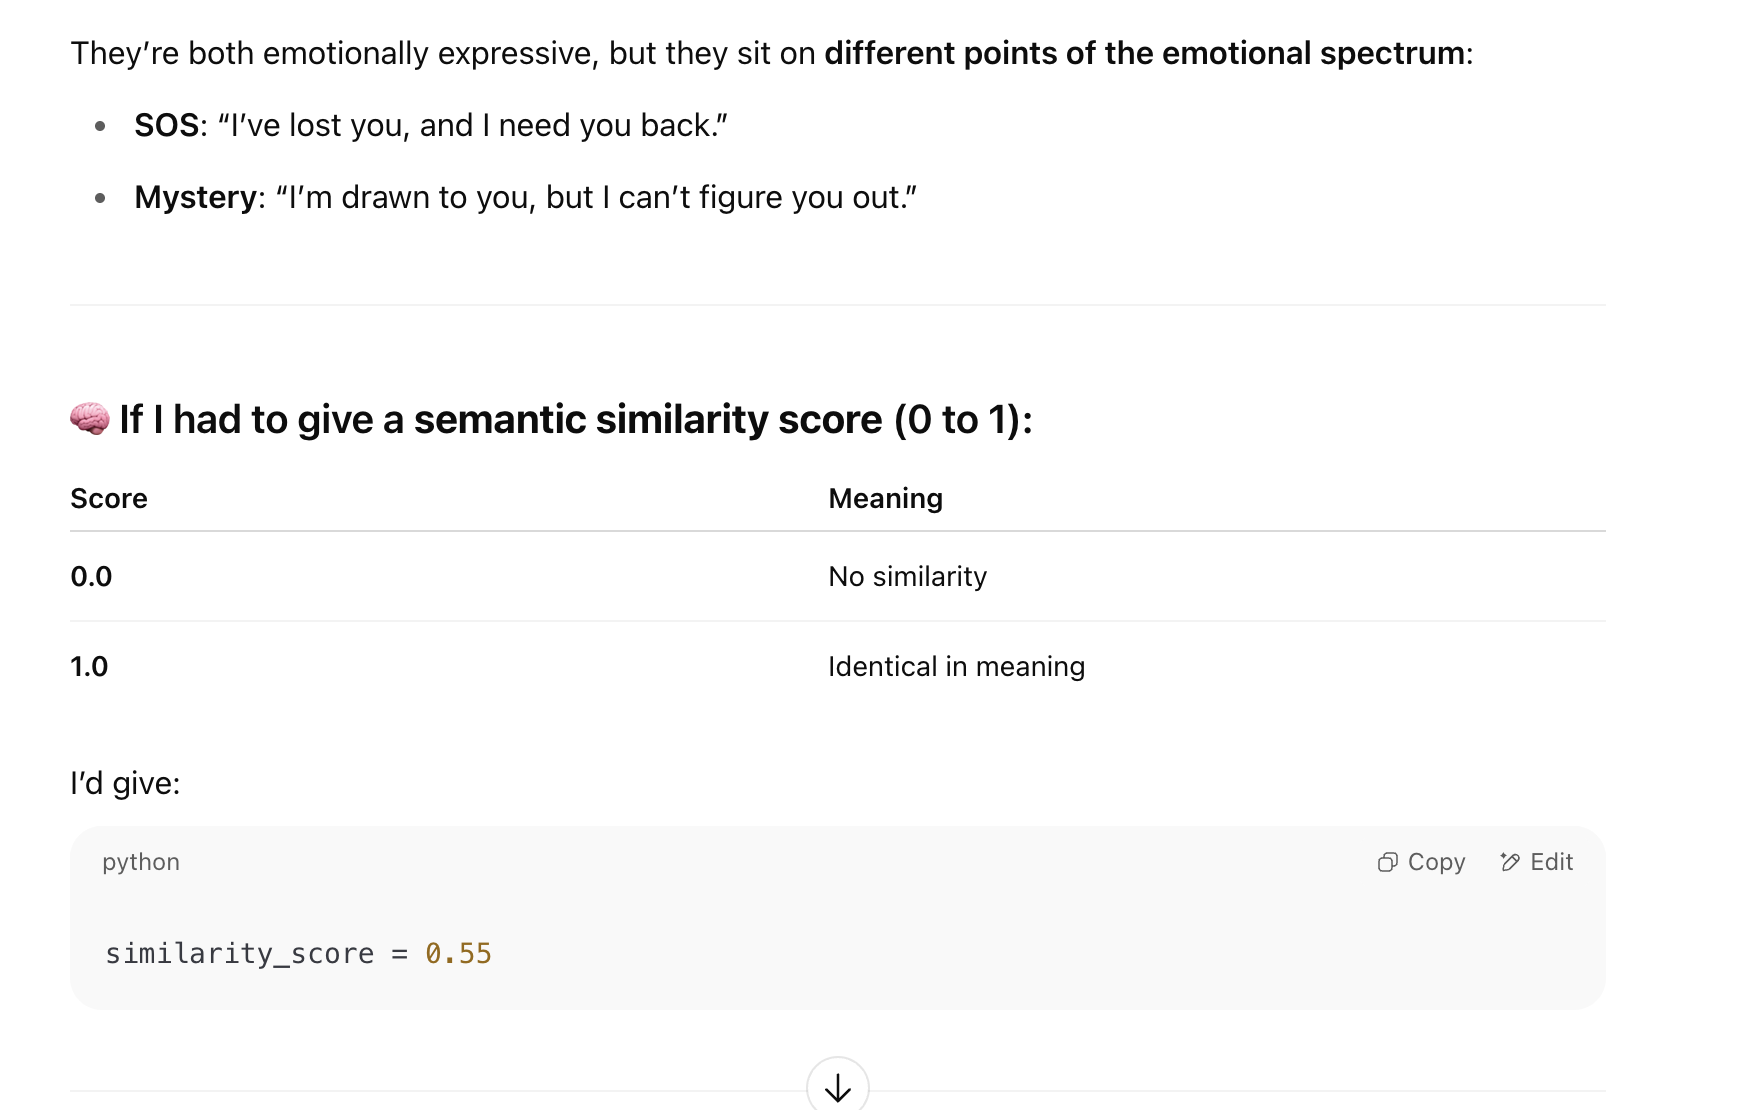

Seeing that lower neighbours = better fitting songs but possibly overfitting (is that a huge issue with our project?)

In [23]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

We will now try to optimize k according to two seperate intrinsic metrics that will judge the accuracy or success of our model. The first of which will be Average Intra-Cluster Cosine Similarity

In [24]:
def avg_cosine_similarity(X, k):
    """
    Computes average cosine similarity to k neighbors for each point in the dataset.
    
    Parameters:
        X (np.ndarray): Matrix of latent song vectors (n_songs x n_features)
        k (int): Number of neighbors
    
    Returns:
        float: Average cosine similarity across all points
    """
    # Fit Nearest Neighbors using cosine distance
    nn = NearestNeighbors(n_neighbors=k+1, metric='cosine').fit(X)
    distances, indices = nn.kneighbors(X)

    # Remove self (first neighbor is the point itself)
    neighbor_indices = indices[:, 1:]

    similarities = []
    for i, neighbors in enumerate(neighbor_indices):
        vec = X[i]
        neighbor_vecs = X[neighbors]
        sims = cosine_similarity([vec], neighbor_vecs)[0]
        similarities.append(np.mean(sims))

    return np.mean(similarities)


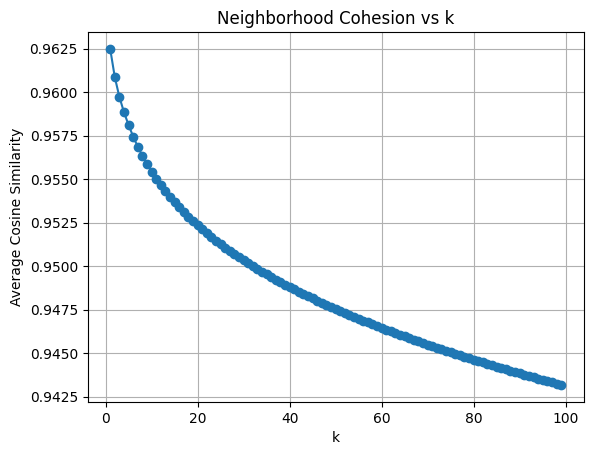

In [25]:
ks = range(1, 100)
scores = [avg_cosine_similarity(X_train, k) for k in ks]

plt.plot(ks, scores, marker='o')
plt.xlabel('k')
plt.ylabel('Average Cosine Similarity')
plt.title('Neighborhood Cohesion vs k')
plt.grid(True)
plt.show()


Now going to try to use Euclidean distance to evaluate k

In [26]:
def avg_neighbor_distance(X, k=5, metric='euclidean'):
    nn = NearestNeighbors(n_neighbors=k+1, metric=metric).fit(X)
    distances, indices = nn.kneighbors(X)
    
    # Ignore the 0 distance to self
    avg_distances = np.mean(distances[:, 1:], axis=1)

    return np.mean(avg_distances)

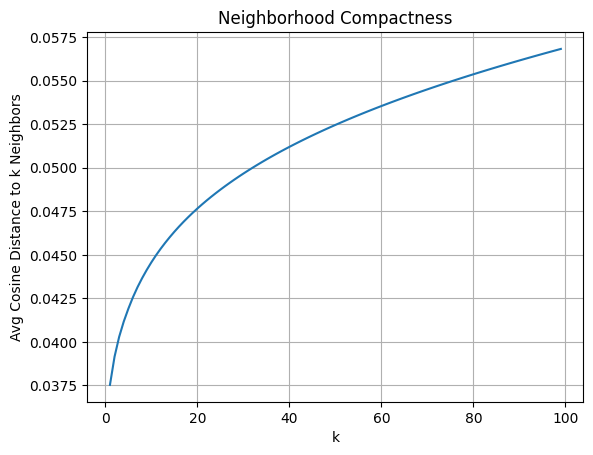

In [27]:
ks = range(1, 100)
scores = [avg_neighbor_distance(X_train, k, metric='cosine') for k in ks]

plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Avg Cosine Distance to k Neighbors')
plt.title('Neighborhood Compactness')
plt.grid(True)
plt.show()


These two metrics, while not exact inverses, are essentially inverses. We know that the lower amount of k is going to give us better "accuracy" but this leads to the problem of overfitting

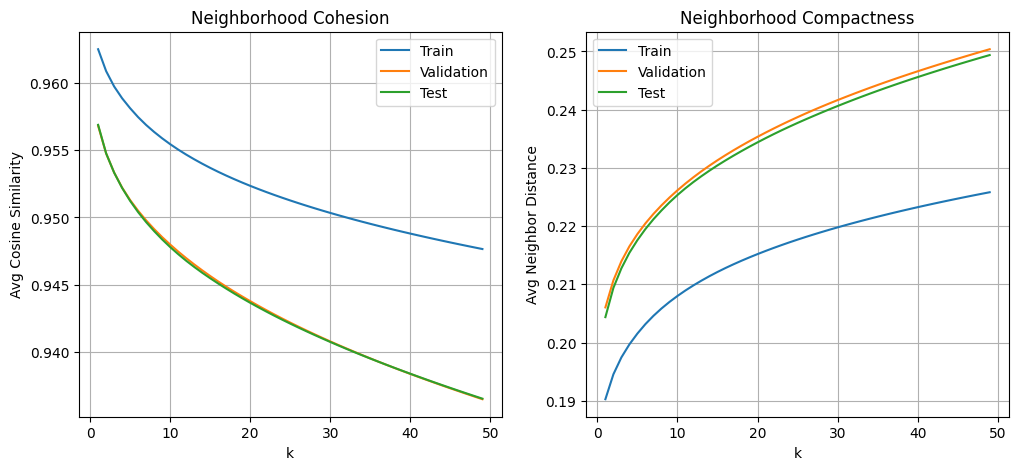

In [28]:
ks = range(1, 50)

train_sim = [avg_cosine_similarity(X_train, k) for k in ks]
val_sim = [avg_cosine_similarity(X_val, k) for k in ks]
test_sim = [avg_cosine_similarity(X_test, k) for k in ks]

train_dist = [avg_neighbor_distance(X_train, k) for k in ks]
val_dist = [avg_neighbor_distance(X_val, k) for k in ks]
test_dist = [avg_neighbor_distance(X_test, k) for k in ks]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ks, train_sim, label='Train')
plt.plot(ks, val_sim, label='Validation')
plt.plot(ks, test_sim, label='Test')
plt.xlabel('k')
plt.ylabel('Avg Cosine Similarity')
plt.title('Neighborhood Cohesion')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ks, train_dist, label='Train')
plt.plot(ks, val_dist, label='Validation')
plt.plot(ks, test_dist, label='Test')
plt.xlabel('k')
plt.ylabel('Avg Neighbor Distance')
plt.title('Neighborhood Compactness')
plt.legend()
plt.grid(True)
plt.show()


Now obviously from a distance standpoint it less k is always going to provide a smaller distance between songs, however I don't think that our group necessarily cares about raw distance. We care about the rankings of who is the CLOSEST, regardless of the actual distance. Instead of worrying about who is closest, I think we want more information (higher k) to have more accuracte reccomendations. I will test that here semantically as we don't have labels. At this juncture, as we are only using the lyrics, I believe that some songs may look like weird reccomendations, however once mroe features are added in the coming weeks, this method will be abundantly better to judge semantically

In [29]:
from collections import Counter

def collect_recommendation_frequencies(knn_model, X_test, top_n=5):
    """
    Collects and counts top-N recommendations for all test songs.
    
    Returns:
        recommendation_counter: Counter of song indices from the training set
    """
    recommendation_counter = Counter()
    
    for i in range(len(X_test)):
        test_vector = X_test[i].reshape(1, -1)
        distances, indices = knn_model.kneighbors(test_vector)
        
        top_recs = indices[0][:top_n]
        recommendation_counter.update(top_recs)
    
    return recommendation_counter


In [30]:
# For a trained k-NN model with k=15
rec_counts_k15 = collect_recommendation_frequencies(knn15, X_test, top_n=5)

# Most frequently recommended songs:
top_common = rec_counts_k15.most_common(20)
for idx, count in top_common:
    song = df_train_encoded['Song'].iloc[idx]
    artist = df_train_encoded['Artist'].iloc[idx]
    print(f"\"{song}\" by {artist} — recommended {count} times")


"Tangled up in Blue" by Bob Dylan — recommended 33 times
"Look What You've Done" by Drake — recommended 26 times
"Aston Martin Music" by Rick Ross,Drake,Chrisette Michele — recommended 25 times
"Diced Pineapples" by Rick Ross,Wale,Drake — recommended 24 times
"Hurricane" by Kanye West — recommended 23 times
"Club Paradise" by Drake — recommended 22 times
"Train Under Water" by Bright Eyes — recommended 19 times
"Paris Morton Music" by Drake — recommended 17 times
"Off My Mind" by Joe P — recommended 16 times
"It Was A Good Day" by Ice Cube — recommended 16 times
"Matilda" by Harry Styles — recommended 15 times
"Lua" by Bright Eyes — recommended 15 times
"Lose Yourself" by Eminem — recommended 14 times
"Favor" by Julien Baker — recommended 13 times
"Semi-Charmed Life" by Third Eye Blind — recommended 13 times
"Over My Dead Body" by Drake — recommended 12 times
"Burn, Burn, Burn" by Zach Bryan — recommended 12 times
"Whatever It Is" by Zac Brown Band — recommended 11 times
"Let Me Blow Y